In [188]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [189]:
data = pd.read_csv("/kaggle/input/insurance/insurance.csv")
data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [190]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [191]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**So, we have no missing data in our dataset. Converting the categorical data points into numerical.**

In [192]:
print(data["sex"].unique())
print(data["smoker"].unique())

['female' 'male']
['yes' 'no']


In [193]:
data["sex"] = data["sex"].replace({"male": 0, "female": 1})
data["smoker"] = data["smoker"].replace({"yes": 1, "no": 0})

/tmp/ipykernel_34/2392294101.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["sex"] = data["sex"].replace({"male": 0, "female": 1})
/tmp/ipykernel_34/2392294101.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["smoker"] = data["smoker"].replace({"yes": 1, "no": 0})


In [194]:
print(data.head(3))

   age  sex    bmi  children  smoker     region     charges
0   19    1  27.90         0       1  southwest  16884.9240
1   18    0  33.77         1       0  southeast   1725.5523
2   28    0  33.00         3       0  southeast   4449.4620


**Plottimg a histogram for all the categories given in the dataframe to understand the data better**

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'children'}>],
       [<Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

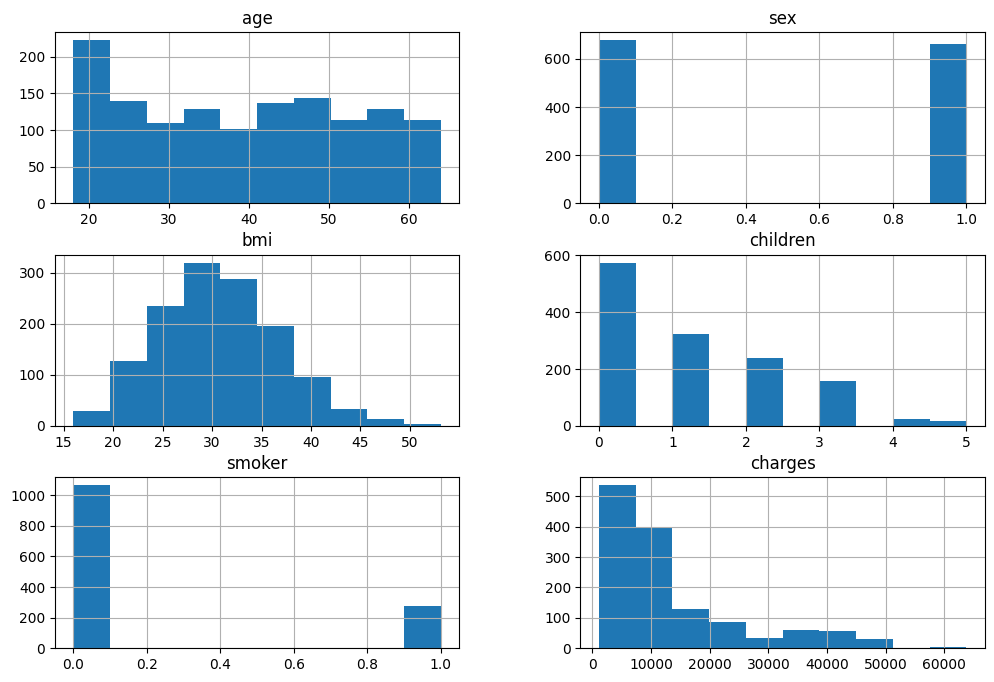

In [195]:
data.hist(figsize = (12, 8))

Out of all the features, only the distribution of bmi is following normal curve, while charges follow power law. Let us try to understand the coorelation between features. 

In [196]:
corr_values = data.corr(numeric_only=True)
print(corr_values)

               age       sex       bmi  children    smoker   charges
age       1.000000  0.020856  0.109272  0.042469 -0.025019  0.299008
sex       0.020856  1.000000 -0.046371 -0.017163 -0.076185 -0.057292
bmi       0.109272 -0.046371  1.000000  0.012759  0.003750  0.198341
children  0.042469 -0.017163  0.012759  1.000000  0.007673  0.067998
smoker   -0.025019 -0.076185  0.003750  0.007673  1.000000  0.787251
charges   0.299008 -0.057292  0.198341  0.067998  0.787251  1.000000


Text(0.5, 1.0, 'BMI vs Hospital charges with indication of smoking features')

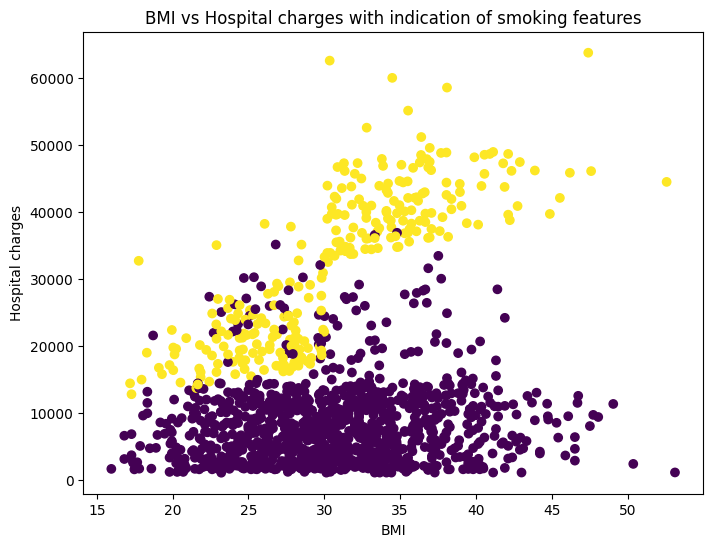

In [197]:
import matplotlib.pyplot as plt 

plt.figure(figsize = (8,6))
plt.scatter(data["bmi"], data["charges"], c = data["smoker"])
plt.xlabel("BMI")
plt.ylabel("Hospital charges")
plt.title("BMI vs Hospital charges with indication of smoking features")

Text(0.5, 1.0, 'Age vs Hospital charges with indication of smoking features')

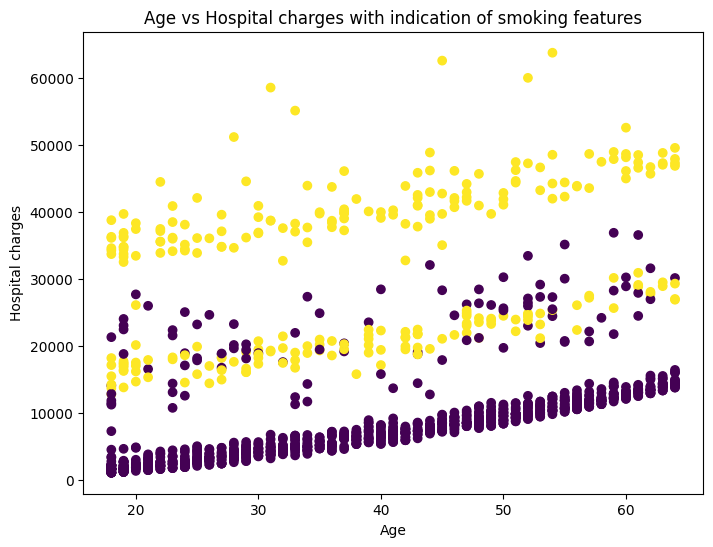

In [198]:
plt.figure(figsize = (8,6))
plt.scatter(data["age"], data["charges"], c = data["smoker"])
plt.xlabel("Age")
plt.ylabel("Hospital charges")
plt.title("Age vs Hospital charges with indication of smoking features")

In [199]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

In [200]:
#SPLITING THE DATASET FIRST 
x = data[["age","sex","bmi","children","smoker"]]
y = data[["charges"]]

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [201]:
linear_clf = LinearRegression().fit(xtrain, ytrain)

In [202]:
#Linear Regression accuracy
linear_clf.score(xtest, ytest)

0.7811302113434095

In [203]:
x = data.drop(["charges", "region"], axis = 1)
y = data["charges"]

poly = PolynomialFeatures(degree = 2)
x_quad = poly.fit_transform(x)

xtrain, xtest, ytrain, ytest = train_test_split(x_quad, y, test_size=0.2, random_state=42)
plr = LinearRegression().fit(xtrain, ytrain)

In [206]:
x1 = plr.score(xtrain, ytrain)
print("The accuracy for training set is ", x1)

The accuracy for training set is  0.8374560089566805


In [207]:
#Polynomial regression of degree 2 
x2 = plr.score(xtest, ytest)
print("The accuracy for test set is ", x2)

The accuracy for test set is  0.8669441556658783


In [251]:
from sklearn.svm import LinearSVR

svr = LinearSVR(C = 1, random_state=42)
svr.fit(xtrain, ytrain)

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(C=1, random_state=42)

In [252]:
x3 = svr.score(xtest, ytest)
print("The accuracy with SVM Regression is ", x3)

The accuracy with SVM Regression is  0.8416670345101529
